In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#데이터 불러오기
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')

documents=pd.read_csv("/content/drive/MyDrive/test.csv",index_col=0)


In [3]:
documents.head()

,No.,Title,Abstract,Chemicals,Meshes,Keywords,doi
0,3-1,Evidence for the presence of an antitumor fact...,('We have previously reported finding a factor...,"['Alpha-Globulins', 'Endotoxins']","['Alpha-Globulins', 'Animals', 'Cattle', 'Cyto...",[],['10.1016/s0304-3835(79)80039-7']
1,13-1,Tumour-necrosis factor from the rabbit. III. R...,('Tumour-necrosis factor (TNF) is growth-inhib...,"['Endotoxins', 'Glycoproteins', 'Growth Inhibi...","['Animals', 'Cell Line', 'Endotoxins', 'Glycop...",[],['10.1038/bjc.1979.218']
2,15-1,Effects of murine tumor necrosis factor on het...,('A partially purified glycoprotein fraction (...,['Glycoproteins'],"['Adenocarcinoma', 'Animals', 'Cells, Cultured...",[],['10.1159/000162922']
3,23-1,Tumour-necrosis factor from the rabbit. I. Mod...,('Sera from rabbits injected with BCG and then...,"['Azides', 'Dinitrophenols', 'Glycoproteins', ...","['Animals', 'Azides', 'Cell Division', 'Cell L...",[],['10.1038/bjc.1978.202']
4,23-2,Tumour-necrosis factor from the rabbit. II. Pr...,('Mononuclear cells from normal rabbit blood w...,['Glycoproteins'],"['Animals', 'Cell Adhesion', 'Cell Line', 'Cyt...",[],['10.1038/bjc.1978.203']


In [4]:
#총 130584개의 논문
documents.shape

(130584, 7)

In [5]:
#Title과 Abstract 추출
title_abstarct=[]
for i in range(documents.shape[0]):
  title_abstarct.append(str(documents.iloc[i]['Title'])+str(documents.iloc[i]['Abstract']).lower())

In [6]:
#추출한 title과 abstract을 토큰화
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

word_List=[]
for sentence in title_abstarct:
  words=word_tokenize(sentence)
  word_List.append(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
def is_digit(str):
  try:
    tmp = float(str)
    return True
  except ValueError:
    return False

In [8]:
#불용어 제거,특수문자 제거,숫자 제거
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words=set(stopwords.words('english'))
remove_set=['.',',',';','(',')',':','\'','"','?',':','``','-','\'\'','%']
result=[]
for sentence in word_List:
  remove_stopword=[]
  sentence=[i for i in sentence if i not in remove_set]
  for word in sentence:
    if word not in stop_words:
      if not is_digit(word):
        remove_stopword.append(word)
  result.append(remove_stopword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
#전처리한 단어들을 Word2Vec으로 임베딩
from gensim.models.word2vec import Word2Vec
model=Word2Vec(result,sg=1)

In [10]:
#유클리디안 거리를 측정하는 함수 정의
from sklearn.metrics.pairwise import euclidean_distances
def get_euclidean_distance(input_word):
  similarity_words=model.wv.most_similar(input_word,topn=50)
  distances=[]
  for similarity in similarity_words:
    smilarity_word=similarity[0]
    distance=euclidean_distances(model[input_word].reshape(1,-1),model[smilarity_word].reshape(1,-1))
    distances.append(distance)
  return distances

In [11]:
#target word 설정
target_word='tnf-α'

In [26]:
#벡터로 임베딩된 단어들의 좌표를 가지고 코사인 유사도와 유클리디안 거리 측정
#가장 유사한 단어 20개를 추출 후 출력
euclidean_distance_list=get_euclidean_distance(target_word)
print(target_word+'과 가장 유사한 단어와 유사도')
df=pd.DataFrame(model.wv.most_similar(target_word,topn=50),columns=['word','cosine similarity'])
df['euclidean_distance']=np.array(get_euclidean_distance(target_word)).reshape(-1,1)
df

tnf-α과 가장 유사한 단어와 유사도


,word,cosine similarity,euclidean_distance
0,tnfα,0.874028,1.568669
1,tnf-alpha,0.818208,1.844363
2,il-1β,0.816793,1.958714
3,il-6,0.796434,1.978047
4,il-β,0.730712,2.251583
5,tnf-a,0.715385,2.340959
6,tnf-á,0.700780,2.280493
7,ifn-γ,0.687628,2.625271
8,factor-α,0.684224,2.773815
9,tnf,0.678138,2.532851


In [ ]:
#결과를 엑셀로 출력
df.to_excel('result.xlsx',header=True)

In [13]:
#임베딩된 단어는 100차원상의 데이터이다. 시각화를 위해 2차원으로 차원축소를 진행
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
%matplotlib inline

target_coor=model[target_word]
coor_list=[]
for i in range(df.shape[0]):
  coor_list.append(model[df.iloc[i]['word']])
coor_df=pd.DataFrame(coor_list,columns=['coor'+str(x) for x in range(100)])
pca=PCA(n_components=2)
#fit( )과 transform( ) 을 호출하여 차원축소
coor_pca =pca.fit_transform(coor_df)
target_coor = pca.transform(np.array(target_coor).reshape(1,-1))

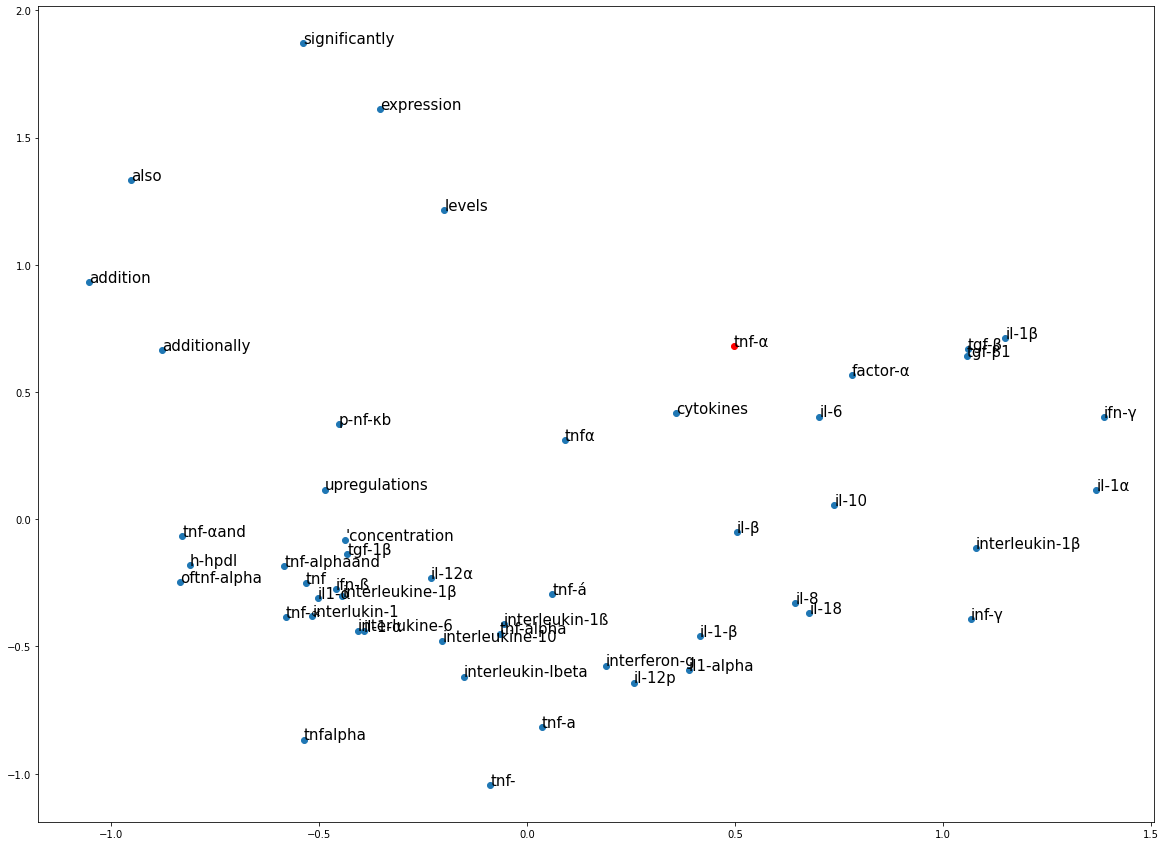

In [24]:
#유사한 단어들과 Target word 시각화
#차원축소로 인해 실제 거리보다 약간의 오차가 있음
pca_df=pd.DataFrame(coor_pca,columns=['X','Y'],index=df['word'])
fig = plt.figure()
fig.set_size_inches(20,15)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(pca_df['X'], pca_df['Y'])

for word, pos in pca_df.iterrows():
    ax.annotate(word, pos, fontsize=15)
ax.scatter(target_coor[0][0],target_coor[0][1],c='r')
ax.annotate(target_word,target_coor[0],fontsize=15)
plt.show()

In [15]:
#임베딩한 단어 목록리스트를 만듦
vocab=list(model.wv.vocab)
vocab

['Evidence',
 'presence',
 'antitumor',
 'factor',
 'serum',
 'normal',
 'animals',
 "'we",
 'previously',
 'reported',
 'finding',
 'activity',
 'tnf',
 'tumor',
 'necrosis',
 'extracts',
 'mice',
 'possibility',
 'exists',
 'blood',
 'species',
 'explored',
 'horse',
 'mouse',
 'dog',
 'human',
 'sheep',
 'calf',
 'rat',
 'shark',
 'serums',
 'fractionated',
 'nh4',
 '2so4',
 'filtered',
 's-200',
 'sephacryl',
 'gel',
 'proteins',
 'molecular',
 'weight',
 '90,000',
 'pooled',
 'concentrated',
 'dialyzed',
 'determined',
 'l-cell',
 'assay',
 'vitro',
 'meth',
 'vivo',
 'found',
 'fractions',
 'agarose',
 'electrophoresis',
 'indicated',
 'principle',
 'components',
 'alpha',
 '1-alpha',
 'globulins',
 'preparative',
 'page',
 'migrated',
 'slowly',
 'made',
 'least',
 'faster',
 'moving',
 'monomeric',
 'protein',
 'Tumour-necrosis',
 'rabbit',
 'III',
 'Relationship',
 'interferons',
 "'tumour-necrosis",
 'growth-inhibitory',
 'cytotoxic',
 'certain',
 'tumour',
 'cell',
 'lines',

In [16]:
#TF-IDF 구현
from math import log
#논문중 20개만 TF-IDF를 구하는데 사용(전체논문을 다쓰기엔 출력까지 시간이 너무 오래 걸림)
N=20

def tf(t,d):
  return d.count(t)

def idf(t):
  df=0
  for doc in result[:20]:
    df+=t in doc
  return log(N/(df+1))

def tfidf(t,d):
  return tf(t,d)*idf(t)

In [17]:
tf_list=[]
for i in range(N):
  tf_list.append([])
  d=result[i]
  for j in range(len(vocab)):
    t=vocab[j]
    tf_list[-1].append(tfidf(t,d))

tf_ = pd.DataFrame(tf_list, columns = vocab,index=documents['No.'][:20])
tf_

,Evidence,presence,antitumor,factor,serum,normal,animals,'we,previously,reported,finding,activity,tnf,tumor,necrosis,extracts,mice,possibility,exists,blood,species,explored,horse,mouse,dog,human,sheep,calf,rat,shark,serums,fractionated,nh4,2so4,filtered,s-200,sephacryl,gel,proteins,molecular,...,mid-aged,i-thp,ido-1,tracp5a,mce3e,pharmacopuncture,hpps,tppps,tppps2,tppps3,lats2,gctrp9,rame,malat1,ddmc/ptx,cyclophilins,large-for-size,aza/6,pctaire1,hrptecs,acutangulum,wayana,t\xa0+\xa0l\xa0+\xa0r,nitrostyrene,pg102,chrankl,ku-cbe,dhpf,mir-517a/b,5-i,wo2,prph2,α7e260a,hp0459,mgy/h,mr-p,gc-fi,mscl,podocytic,tfkd
No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3-1,2.302585,1.386294,4.60517,1.070025,4.815891,4.828314,3.79424,2.302585,2.302585,1.89712,1.89712,1.386294,3.064954,0.356675,0.287682,2.302585,1.049822,1.89712,2.302585,1.386294,1.89712,2.302585,2.302585,4.199288,4.60517,2.043302,2.302585,2.302585,1.89712,2.302585,2.302585,2.302585,2.302585,2.302585,2.302585,2.302585,2.302585,1.609438,1.386294,1.89712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13-1,0.000000,0.000000,0.00000,0.713350,4.815891,0.000000,0.00000,0.000000,0.000000,1.89712,0.00000,2.772589,5.619082,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.89712,0.000000,0.000000,1.049822,0.00000,0.510826,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15-1,0.000000,0.000000,0.00000,1.070025,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,1.021651,0.713350,0.575364,0.000000,3.149466,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,1.532477,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23-1,0.000000,1.386294,0.00000,1.070025,2.407946,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,3.064954,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,1.049822,0.00000,0.510826,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23-2,0.000000,0.000000,0.00000,1.783375,0.000000,3.218876,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,1.021651,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.386294,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438,0.000000,1.89712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37-1,0.000000,0.000000,0.00000,1.070025,3.611918,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,2.554128,1.070025,1.438410,0.000000,2.099644,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,1.049822,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42-1,0.000000,0.000000,0.00000,0.713350,0.000000,0.000000,5.69136,0.000000,0.000000,0.00000,0.00000,0.000000,1.532477,0.713350,0.575364,0.000000,0.000000,0.00000,0.000000,0.000000,